# Zero to Hero

## 2.01 Optimizacion Bayesiana

### Advertencia

El uso del método de Optimización Bayesiana para la optimización de hiperparámetros en modelos predictivos tiene menos de una década.
Entender los fundamentos de la O.B. requieren de una sólida formación matemática y **no** son el objetivo de esta asignatura.
Para quienes deseen aventurarse a los detalles técnicos:
* El paper original de la libreria mlrMBO (año 2018 )   https://arxiv.org/pdf/1703.03373.pdf
* El método de Kriging , tal cual se deriva del uso original, en este pequeño libro de 106 páginas "Basic Steps in Geostatistics: The Variogram and Kriging" https://www.pdfdrive.com/basic-steps-in-geostatistics-the-variogram-and-kriging-e187336318.html

### El código

In [1]:
#Ejemplo de optimizacion bayesiana, univariada

#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

library("data.table")
#paquetes necesarios para la Bayesian Optimization
library("DiceKriging")
library("mlrMBO")

options(repr.plot.width=20, repr.plot.height=10)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,614728,32.9,1321401,70.6,1321401,70.6
Vcells,1093606,8.4,8388608,64.0,1632451,12.5


Warning message:
"package 'data.table' was built under R version 4.2.3"
Warning message:
"package 'DiceKriging' was built under R version 4.2.3"
Warning message:
"package 'mlrMBO' was built under R version 4.2.3"
Loading required package: mlr

Warning message:
"package 'mlr' was built under R version 4.2.3"
Loading required package: ParamHelpers

Warning message:
"package 'ParamHelpers' was built under R version 4.2.3"
Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: smoof

Warning message:
"package 'smoof' was built under R version 4.2.3"
Loading required package: checkmate

Warning message:
"package 'checkmate' was built under R version 4.2.3"

Attaching package: 'checkmate'


The following object is masked from 'package:DiceKriging':

    checkNames




### Defino la funcion a optimizar, un polinomio de grado 4

In [2]:
func_univariada01  <- function( x )
{
  y  <- -2 * (x+13) * (x-3) * (x-7) * (x-19)

  return( y )
}

Grafico la funcion

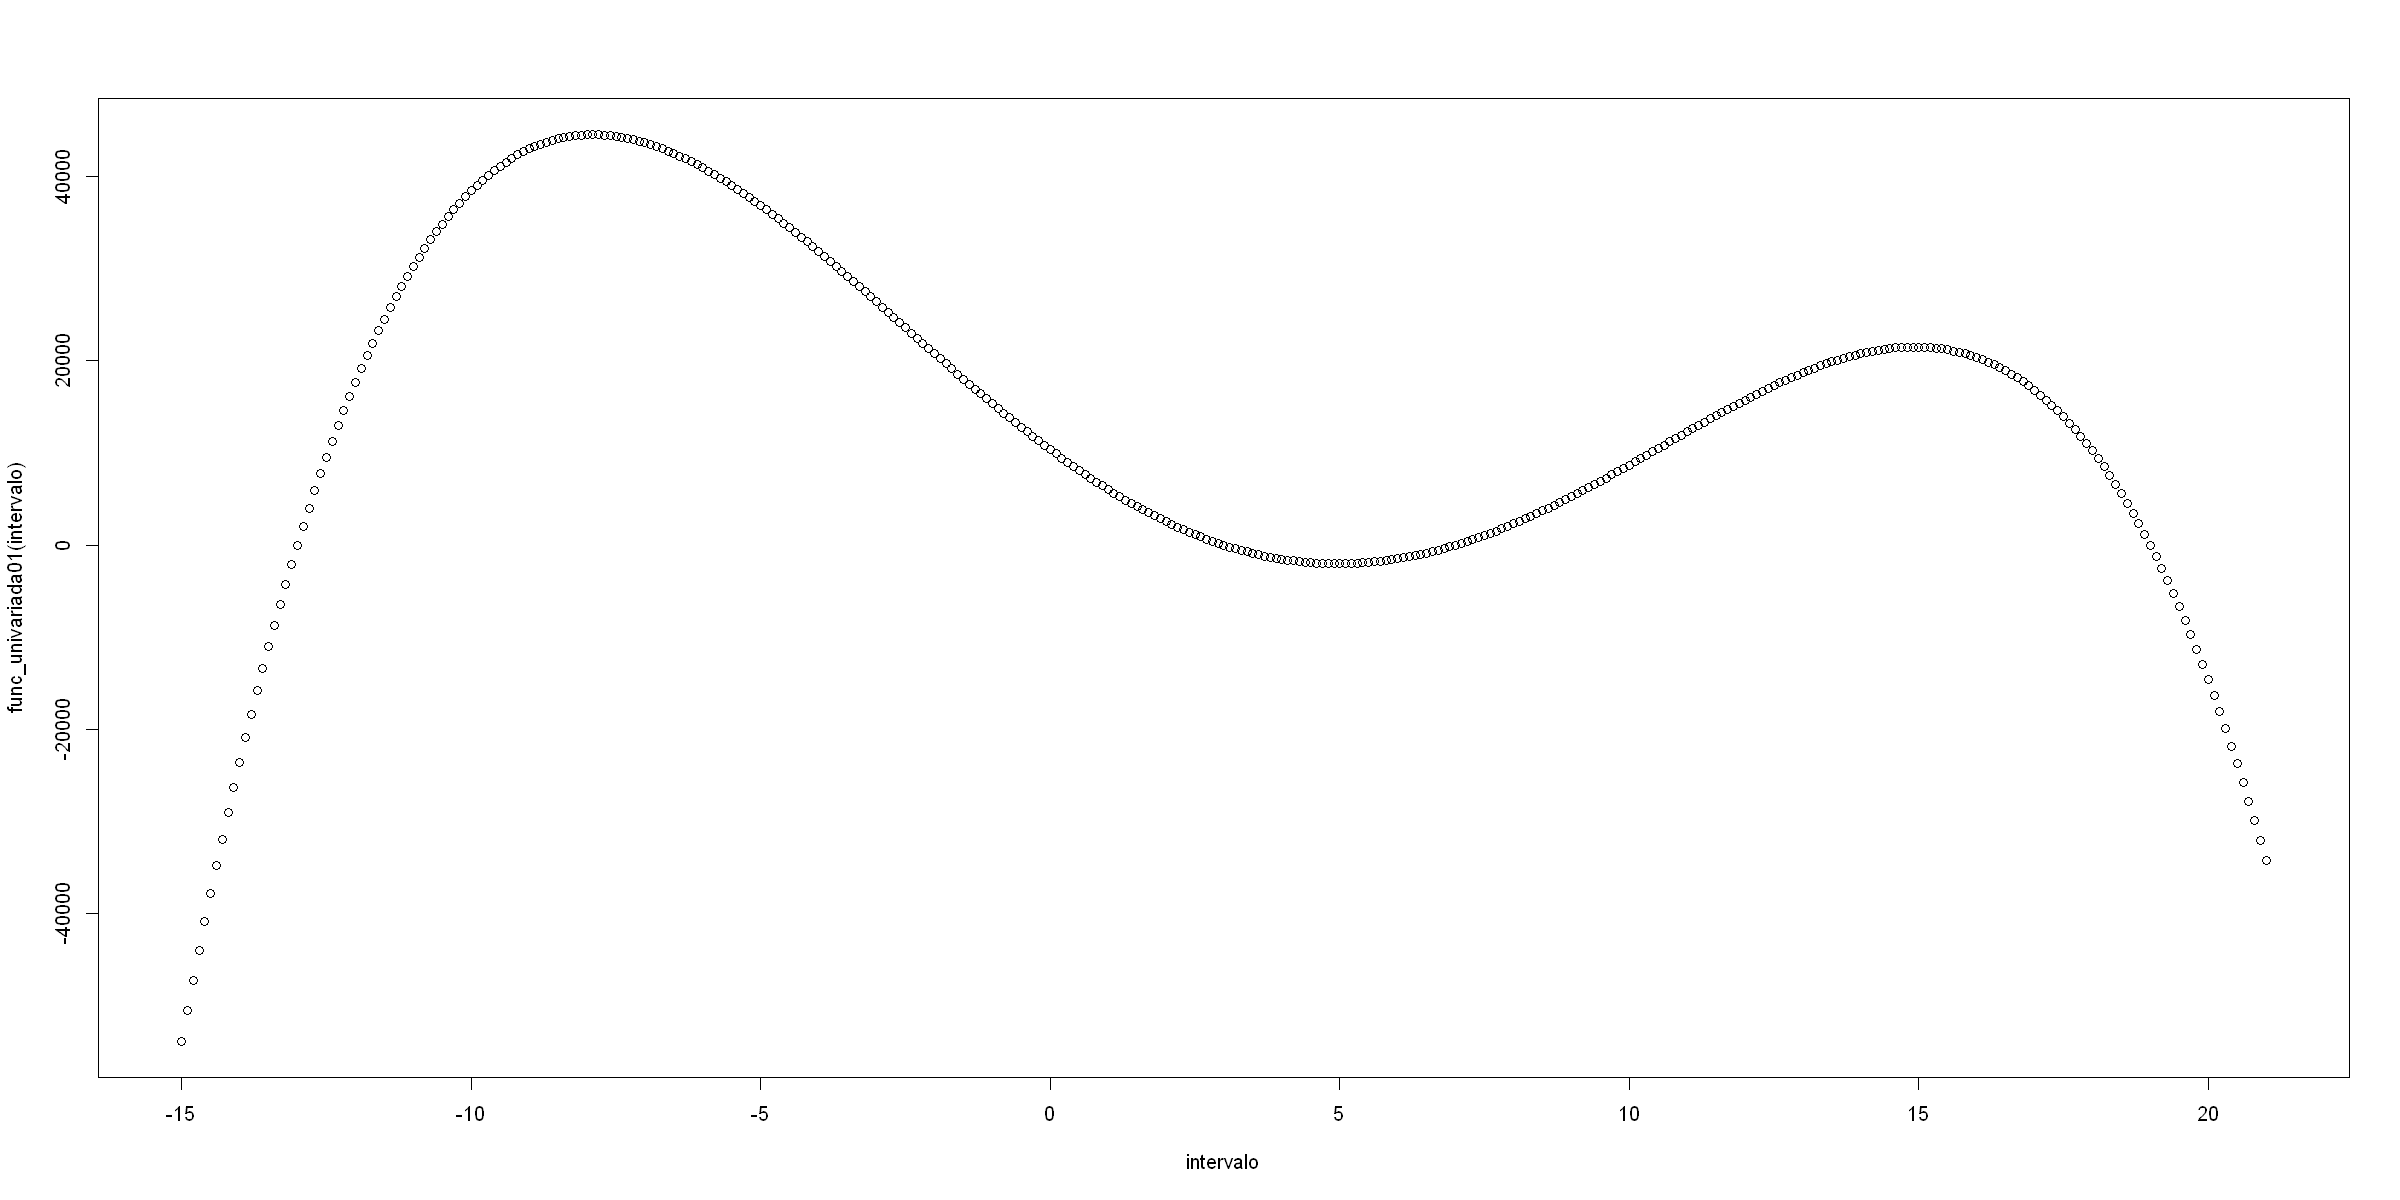

In [3]:
intervalo  <- seq(-15,21,0.1)
plot(intervalo, func_univariada01(intervalo))

La funcion tiene dos máximos, uno de ellos es el global.

### Optimizacion Bayesiana

¿Qué tan rápido encontrará la Optmización Bayesiana el máximo global?

Defino las caracteristicas de la optimizacion

* **fn**    es el nombre de la funcion
* **minimize**   por defecto es TRUE,  pero en este caso le asigno FALSE, ya que deseo maximizar  el valor
* **par.set**  indica cuales son los hiperparmetros de la funcion, en este caso hay una sola variable que llamé  x
---
* **makeNumericParam** indica que ese hiperparámetro es un numero real, una variable continua  ( no es ni un entero ni una categoria )

In [4]:
obj.fun  <- makeSingleObjectiveFunction(
              fn=       func_univariada01,
              minimize= FALSE,   #estoy Maximizando la ganancia
              par.set=  makeParamSet(  makeNumericParam( "x", lower= -100, upper=  100) ),
             )

ahora defino la funcion proxy, la que se construye internamente intentando emular la realidad

* **cl**  es la clase de learner,  "reg.km" indica el método de kriging "**reg**ression **k**riging **m**ethodd"
* **predict.type**  es el tipo de prediccion que deseo me devuelva, "se" significa que espero dos valores  media y standard error
* **covtype**    es la funcion de covarianza que se va a utilizar, cual es la covarianza de dos mediciones como fucion de la distancia entre los puntos donde fueron tomadas las mediciones, fue inventada por Bertil Matérn 

El método de kriging puede verse en su forma original (la geología) , esta presentación https://www.youtube.com/watch?v=ZB7GvJrNKq0

In [5]:
fproxy  <- makeLearner( cl= "regr.km",
                        predict.type= "se", 
                        covtype= "matern3_2" )

ultima definicion,  especificar la optimizacion bayesiana
*  **crit**   indica el criterio con el que se completan los valores iniciales "no inteligentes"
*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.

In [7]:
ctrl  <- makeMBOControl()
ctrl  <- setMBOControlInfill( ctrl, crit= makeMBOInfillCritEI())
ctrl  <- setMBOControlTermination( ctrl, iters= 25 )

finalmente , lanzo la Optimizacion Bayesiana

* **fun**  es la especificacion de la funcion que deseo optimizar, si maximizo o minimizo, cuales son las variables de la misma
* **learner**  especifica cual es la función proxy interna que va a utilizar la Optimziación Bayesiana
* **control**  indica la la forma en que se harán las iteraciones

In [8]:
run  <- mbo( fun=      obj.fun, 
             learner= fproxy, 
             control= ctrl )

Computing y column(s) for design. Not provided.

[mbo] 0: x=-98.8 : y = -2.18e+08 : 0.0 secs : initdesign

[mbo] 0: x=62.2 : y = -2.13e+07 : 0.0 secs : initdesign

[mbo] 0: x=-10.6 : y = 3.41e+04 : 0.0 secs : initdesign

[mbo] 0: x=19.4 : y = -4.62e+03 : 0.0 secs : initdesign




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  322.0969 
  - best initial criterion value(s) :  -78.15895 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       78.159  |proj g|=   0.00098273
At iterate     1  f =       78.159  |proj g|=    0.00098257
At iterate     2  f =       78.156  |proj g|=    0.00011586
At iterate     3  f =       78.156  |proj g|=    1.1668e-05
At iterate     4  f =       78.156  |proj g|=    1.2204e-07
At iterate     5  f =       78.156  |proj g|=    1.3038e-10

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.30377e-10
final functio

[mbo] 1: x=3.01 : y = -11.4 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  322.0969 
  - best initial criterion value(s) :  -95.30468 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       95.305  |proj g|=   0.00027905
At iterate     1  f =       95.305  |proj g|=    0.00027902

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000279016
final function value 95.3047

F = 95.3047
final  value 95.304677 
converged


[mbo] 2: x=100 : y = -1.65e+08 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -115.9589 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       115.96  |proj g|=   0.00036628
At iterate     1  f =       115.96  |proj g|=    0.00036617

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000366173
final function value 115.959

F = 115.959
final  value 115.958862 
converged


[mbo] 3: x=40 : y = -2.71e+06 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -133.6185 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       133.62  |proj g|=    0.0016772
At iterate     1  f =       133.62  |proj g|=     0.0016768
At iterate     2  f =       133.61  |proj g|=    0.00020628
At iterate     3  f =       133.61  |proj g|=    2.9468e-05
At iterate     4  f =       133.61  |proj g|=    6.2716e-07
At iterate     5  f =       133.61  |proj g|=    1.9592e-09

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.95918e-09
final function

[mbo] 4: x=-4.6 : y = 3.5e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -149.5252 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       149.53  |proj g|=   0.00084299
At iterate     1  f =       149.53  |proj g|=    0.00084292
At iterate     2  f =       149.52  |proj g|=     0.0001436
At iterate     3  f =       149.52  |proj g|=    1.9675e-05
At iterate     4  f =       149.52  |proj g|=    3.9176e-07
At iterate     5  f =       149.52  |proj g|=    1.0961e-09

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.0961e-09
final function 

[mbo] 5: x=28.3 : y = -4.16e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -165.6648 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       165.66  |proj g|=    0.0002483
At iterate     1  f =       165.66  |proj g|=    0.00024829

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000248289
final function value 165.665

F = 165.665
final  value 165.664791 
converged


[mbo] 6: x=11.2 : y = 1.31e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -181.2484 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       181.25  |proj g|=   0.00059972
At iterate     1  f =       181.25  |proj g|=    0.00059969

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000599689
final function value 181.248

F = 181.248
final  value 181.248446 
converged


[mbo] 7: x=-22.4 : y = -5.87e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -198.5748 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       198.57  |proj g|=   0.00040658
At iterate     1  f =       198.57  |proj g|=    0.00040657

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000406569
final function value 198.575

F = 198.575
final  value 198.574752 
converged


[mbo] 8: x=-17 : y = -1.38e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -213.7874 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       213.79  |proj g|=   2.9906e-05
At iterate     1  f =       213.79  |proj g|=    2.9905e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 2.9905e-05
final function value 213.787

F = 213.787
final  value 213.787386 
converged


[mbo] 9: x=23.5 : y = -1.11e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -228.3829 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       228.38  |proj g|=   4.6735e-05
At iterate     1  f =       228.38  |proj g|=    4.6734e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 4.67341e-05
final function value 228.383

F = 228.383
final  value 228.382889 
converged


[mbo] 10: x=7.14 : y = 283 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -242.7653 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       242.77  |proj g|=   0.00034162
At iterate     1  f =       242.77  |proj g|=    0.00034161

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000341614
final function value 242.765

F = 242.765
final  value 242.765319 
converged


[mbo] 11: x=15.3 : y = 2.14e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -256.9717 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       256.97  |proj g|=   0.00022232
At iterate     1  f =       256.97  |proj g|=    0.00022232

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000222318
final function value 256.972

F = 256.972
final  value 256.971705 
converged


[mbo] 12: x=-0.931 : y = 1.5e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -271.0691 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       271.07  |proj g|=   0.00022231
At iterate     1  f =       271.07  |proj g|=     0.0002223

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000222304
final function value 271.069

F = 271.069
final  value 271.069124 
converged


[mbo] 13: x=-7.71 : y = 4.45e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -284.8099 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       284.81  |proj g|=   0.00063887
At iterate     1  f =       284.81  |proj g|=    0.00063886

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000638856
final function value 284.81

F = 284.81
final  value 284.809889 
converged


[mbo] 14: x=-13.5 : y = -1.04e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -298.5951 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        298.6  |proj g|=    0.0013849
At iterate     1  f =        298.6  |proj g|=     0.0013848
At iterate     2  f =       298.57  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 298.574

F = 298.574
final  value 298.574307 
converged


[mbo] 15: x=13.3 : y = 1.94e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -311.7294 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       311.73  |proj g|=    0.0017105
At iterate     1  f =       311.73  |proj g|=     0.0017104
At iterate     2  f =       311.71  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 311.713

F = 311.713
final  value 311.712938 
converged


[mbo] 16: x=17.3 : y = 1.5e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -324.8726 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       324.87  |proj g|=    0.0030602
At iterate     1  f =       324.87  |proj g|=     0.0030601
At iterate     2  f =       324.77  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 324.769

F = 324.769
final  value 324.769096 
converged


[mbo] 17: x=5.07 : y = -2.01e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -337.9699 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       337.97  |proj g|=    0.0033452
At iterate     1  f =       337.97  |proj g|=     0.0033451
At iterate     2  f =       337.87  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 337.873

F = 337.873
final  value 337.872532 
converged


[mbo] 18: x=-2.81 : y = 2.53e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -350.8084 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       350.81  |proj g|=    0.0031801
At iterate     1  f =       350.81  |proj g|=       0.00318
At iterate     2  f =       350.77  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 350.769

F = 350.769
final  value 350.769179 
converged


[mbo] 19: x=9.22 : y = 6e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -363.9747 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       363.97  |proj g|=    0.0056536
At iterate     1  f =       363.97  |proj g|=     0.0056533
At iterate     2  f =        363.7  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 363.702

F = 363.702
final  value 363.702158 
converged


[mbo] 20: x=-6.22 : y = 4.17e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -376.3306 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       376.33  |proj g|=    0.0042501
At iterate     1  f =       376.33  |proj g|=     0.0042499
At iterate     2  f =       376.26  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 376.264

F = 376.264
final  value 376.263591 
converged


[mbo] 21: x=1 : y = 6.04e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -389.2 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        389.2  |proj g|=    0.0049402
At iterate     1  f =        389.2  |proj g|=       0.00494
At iterate     2  f =        389.1  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 389.099

F = 389.099
final  value 389.098878 
converged


[mbo] 22: x=-9.15 : y = 4.25e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -401.5225 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       401.52  |proj g|=    0.0046869
At iterate     1  f =       401.52  |proj g|=     0.0046867
At iterate     2  f =       401.51  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 401.507

F = 401.507
final  value 401.507280 
converged


[mbo] 23: x=-19.6 : y = -3.03e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -415.1416 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       415.14  |proj g|=    0.0055647
At iterate     1  f =       415.14  |proj g|=     0.0055645
At iterate     2  f =       415.07  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 415.065

F = 415.065
final  value 415.065195 
converged


[mbo] 24: x=21.3 : y = -4.05e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -428.1132 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       428.11  |proj g|=    0.0063918
At iterate     1  f =       428.11  |proj g|=     0.0063915
At iterate     2  f =       427.98  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 427.982

F = 427.982
final  value 427.982025 
converged


[mbo] 25: x=-11.9 : y = 1.86e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  397.601 
  - best initial criterion value(s) :  -440.4679 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       440.47  |proj g|=    0.0067966
At iterate     1  f =       440.47  |proj g|=     0.0067963
At iterate     2  f =       440.34  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 440.338

F = 440.338
final  value 440.338352 
converged


In [9]:
tb_resultados  <- as.data.table( run$opt.path )

In [10]:
tb_resultados

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-98.8008659,-2.177263e+08,0,NA,NA,0.01,NA,NA,NA,initdesign,NA,NA,NA
62.2476088,-2.130439e+07,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
-10.5891358,3.410133e+04,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
19.3537709,-4.624816e+03,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
3.0055651,-1.138140e+01,1,NA,NA,0.00,-8047390.37,NA,0.06,infill_ei,0.14,11926418.66,5596408.370
99.9996341,-1.651359e+08,2,NA,NA,0.00,-3851393.90,NA,0.01,infill_ei,0.17,47036602.73,-47430808.745
39.9643568,-2.705970e+06,3,NA,NA,0.00,-9692503.85,NA,0.02,infill_ei,0.17,19919410.59,3311126.103
-4.6027737,3.496735e+04,4,NA,NA,0.00,-1964466.99,NA,0.03,infill_ei,0.21,3442663.80,1088380.964
28.3210009,-4.158645e+05,5,NA,NA,0.00,-1345678.53,NA,0.02,infill_ei,0.19,4421091.48,-875779.992


In [11]:
tb_resultados[ which.max( tb_resultados$y ) ]

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-7.705352,44518.63,13,NA,NA,0,-160531.4,NA,0,infill_ei,0.21,376203.2,55419.94


### Conclusiones

La gran pregunta es :  la Optimización Bayesiana, ¿se focaliza luego de muchas iteraciones solo en el entorno del máximo que está cerca de x= -8 ?